In [40]:
import pandas as pd

In [41]:
INFO_COLUMNS = ["class", "type", "linked", "fileschanged",
                "ndev", "age", "exp", "rexp", "sexp",
                "glm_probability", "classification",
                "time_of_day", "day_of_week", "is_weekend",
                "author_experience", "author_ownership",
                "hash","file"]

Y_COLUMN = ['contains_bug']

X_COLUMNS = ["d_cbo","d_cboModified","d_fanin",
             "d_fanout","d_wmc","d_dit","d_noc",
             "d_rfc","d_lcom","d_lcom*","d_tcc",
             "d_lcc","d_totalMethodsQty","d_staticMethodsQty",
             "d_publicMethodsQty","d_privateMethodsQty","d_protectedMethodsQty",
             "d_defaultMethodsQty","d_visibleMethodsQty","d_abstractMethodsQty",
             "d_finalMethodsQty","d_synchronizedMethodsQty","d_totalFieldsQty",
             "d_staticFieldsQty","d_publicFieldsQty","d_privateFieldsQty",
             "d_protectedFieldsQty","d_defaultFieldsQty","d_finalFieldsQty",
             "d_synchronizedFieldsQty","d_nosi","d_loc","d_returnQty","d_loopQty",
             "d_comparisonsQty","d_tryCatchQty","d_parenthesizedExpsQty","d_stringLiteralsQty",
             "d_numbersQty","d_assignmentsQty","d_mathOperationsQty","d_variablesQty",
             "d_maxNestedBlocksQty","d_anonymousClassesQty","d_innerClassesQty",
             "d_lambdasQty","d_uniqueWordsQty","d_modifiers","d_logStatementsQty",
             "cbo","cboModified","fanin","fanout","wmc","dit","noc","rfc","lcom","lcom*",
             "tcc","lcc","totalMethodsQty","staticMethodsQty","publicMethodsQty",
             "privateMethodsQty","protectedMethodsQty","defaultMethodsQty",
             "visibleMethodsQty","abstractMethodsQty","finalMethodsQty",
             "synchronizedMethodsQty","totalFieldsQty","staticFieldsQty",
             "publicFieldsQty","privateFieldsQty","protectedFieldsQty",
             "defaultFieldsQty","finalFieldsQty","synchronizedFieldsQty",
             "nosi","loc","returnQty","loopQty","comparisonsQty",
             "tryCatchQty","parenthesizedExpsQty","stringLiteralsQty",
             "numbersQty","assignmentsQty","mathOperationsQty",
             "variablesQty","maxNestedBlocksQty","anonymousClassesQty",
             "innerClassesQty","lambdasQty","uniqueWordsQty",
             "modifiers","logStatementsQty","fix","entrophy","la","ld",
             "net_lines_changed","absolute_lines_changed","lines_per_file",
             "changed_file_count",
             #"entropy_bucket"
             ]

In [42]:
# read the merged df

# done:
# elasticsearch_merged_df
# camel_merged_df

df = pd.read_csv('merged_datasets/new/elasticsearch_merged_df.csv')

print(df.shape[0])

429899


In [ ]:
"""# or read all into single df
dfs = [#"merged_datasets/elasticsearch_merged_df.csv",
       "merged_datasets/camel_merged_df.csv",
       "merged_datasets/spark_merged_df.csv",
       "merged_datasets/spring-boot_merged_df.csv",]

df = pd.concat([pd.read_csv(f) for f in dfs])

df = df.reset_index(drop=True)"""

C:\Users\nipyh\AppData\Local\Temp\ipykernel_25948\1760021835.py:7: DtypeWarning: Columns (100,102,103,116) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f) for f in dfs])


In [43]:
# drop 'classification' column, it's not needed, and mostly NaN values
df = df.drop('classification', axis=1)

In [44]:
###################################
#        Problematic Columns      #
###################################

# fill NaN values in d_lcom* with 0
df['d_lcom*'] = df['d_lcom*'].fillna(0)

# fill NaN values in 'd_tcc' with 0
df['d_tcc'] = df['d_tcc'].fillna(0)

# fill NaN values in 'd_lcc' with 0
df['d_lcc'] = df['d_lcc'].fillna(0)

# fill NaN values in d_lcom* with 0
df['lcom*'] = df['lcom*'].fillna(0)

# fill NaN values in 'tcc' with 0
df['tcc'] = df['tcc'].fillna(0)

# fill NaN values in 'lcc' with 0
df['lcc'] = df['lcc'].fillna(0)

In [45]:
df.head()

,d_cbo,d_cboModified,d_fanin,d_fanout,d_wmc,d_dit,d_noc,d_rfc,d_lcom,d_lcom*,...,net_lines_changed,absolute_lines_changed,lines_per_file,author_experience,author_ownership,changed_file_count,entropy_bucket,num_files_changed,hash,file
0,0,0,0,0,-7,0,0,-14,0,0.0625,...,57.0,409.0,102.25,14937.5,615.0,4,low,4,eb9b897e27bc245cf4124672fa8c7f6fbfe28538,server/src/main/java/org/elasticsearch/common/...
1,0,0,0,0,0,0,0,0,0,0.0000,...,87.0,93.0,23.25,820.5,617.0,4,low,4,521e4341d7d310ecc4634c5a75a1690b7d9c4884,server/src/main/java/org/elasticsearch/common/...
2,0,0,0,0,0,0,0,0,0,0.0000,...,87.0,93.0,23.25,820.5,617.0,4,low,4,521e4341d7d310ecc4634c5a75a1690b7d9c4884,server/src/main/java/org/elasticsearch/common/...
3,0,0,0,0,0,0,0,0,0,0.0000,...,87.0,93.0,23.25,820.5,617.0,4,low,4,521e4341d7d310ecc4634c5a75a1690b7d9c4884,server/src/main/java/org/elasticsearch/common/...
4,0,0,0,0,0,0,0,0,0,0.0000,...,87.0,93.0,23.25,820.5,617.0,4,low,4,521e4341d7d310ecc4634c5a75a1690b7d9c4884,server/src/main/java/org/elasticsearch/common/...


In [101]:
# print 5 rows where it contains only 1 NAN value
"""pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
print(df[df.isnull().sum(axis=1) > 0 ].head(7))"""

"pd.set_option('display.max_columns', None)\npd.set_option('display.max_rows', None)\npd.set_option('display.width', None)\nprint(df[df.isnull().sum(axis=1) > 0 ].head(7))"

In [46]:
# print the number of rows in the merged_df where its empty column size is greater than 5
print(df[df.isnull().sum(axis=1) > 5].shape[0])


0


In [47]:
# remove these rows
df = df[df.isnull().sum(axis=1) <= 5]
df.head()

,d_cbo,d_cboModified,d_fanin,d_fanout,d_wmc,d_dit,d_noc,d_rfc,d_lcom,d_lcom*,...,net_lines_changed,absolute_lines_changed,lines_per_file,author_experience,author_ownership,changed_file_count,entropy_bucket,num_files_changed,hash,file
0,0,0,0,0,-7,0,0,-14,0,0.0625,...,57.0,409.0,102.25,14937.5,615.0,4,low,4,eb9b897e27bc245cf4124672fa8c7f6fbfe28538,server/src/main/java/org/elasticsearch/common/...
1,0,0,0,0,0,0,0,0,0,0.0000,...,87.0,93.0,23.25,820.5,617.0,4,low,4,521e4341d7d310ecc4634c5a75a1690b7d9c4884,server/src/main/java/org/elasticsearch/common/...
2,0,0,0,0,0,0,0,0,0,0.0000,...,87.0,93.0,23.25,820.5,617.0,4,low,4,521e4341d7d310ecc4634c5a75a1690b7d9c4884,server/src/main/java/org/elasticsearch/common/...
3,0,0,0,0,0,0,0,0,0,0.0000,...,87.0,93.0,23.25,820.5,617.0,4,low,4,521e4341d7d310ecc4634c5a75a1690b7d9c4884,server/src/main/java/org/elasticsearch/common/...
4,0,0,0,0,0,0,0,0,0,0.0000,...,87.0,93.0,23.25,820.5,617.0,4,low,4,521e4341d7d310ecc4634c5a75a1690b7d9c4884,server/src/main/java/org/elasticsearch/common/...


In [48]:
print(df.shape[0])

429899


In [49]:
# Convert entrophy bucket to a number
# low = 0, medium = 1, high = 2

#df['entropy_bucket'] = df['entropy_bucket'].map({'low': 0, 'medium': 1, 'high': 2})

In [50]:
print(df.shape[0])

429899


In [51]:
# fill NaN values with 0 into new df
df_filled = df.fillna(0)


Not planning to use next ones hopefully 🙏

In [52]:
# normalize the data between 0 and 1 into new df
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df[X_COLUMNS]), columns=X_COLUMNS)

df_normalized['contains_bug'] = df['contains_bug']

In [53]:
df_filled_normalized = df_normalized.fillna(0)

# Column Selection

Some columns does not make sense or they require additional human review (such as 'fix' column which indicates if a commit fixes a bug)

In [54]:
NUMERIC_COLUMNS = ["d_cbo","d_cboModified","d_fanin",
             "d_fanout","d_wmc","d_dit","d_noc",
             "d_rfc","d_lcom","d_lcom*","d_tcc",
             "d_lcc","d_totalMethodsQty","d_staticMethodsQty",
             "d_publicMethodsQty","d_privateMethodsQty","d_protectedMethodsQty",
             "d_defaultMethodsQty","d_visibleMethodsQty","d_abstractMethodsQty",
             "d_finalMethodsQty","d_synchronizedMethodsQty","d_totalFieldsQty",
             "d_staticFieldsQty","d_publicFieldsQty","d_privateFieldsQty",
             "d_protectedFieldsQty","d_defaultFieldsQty","d_finalFieldsQty",
             "d_synchronizedFieldsQty","d_nosi","d_loc","d_returnQty","d_loopQty",
             "d_comparisonsQty","d_tryCatchQty","d_parenthesizedExpsQty","d_stringLiteralsQty",
             "d_numbersQty","d_assignmentsQty","d_mathOperationsQty","d_variablesQty",
             "d_maxNestedBlocksQty","d_anonymousClassesQty","d_innerClassesQty",
             "d_lambdasQty","d_uniqueWordsQty","d_modifiers","d_logStatementsQty",
             "cbo","cboModified","fanin","fanout","wmc","dit","noc","rfc","lcom","lcom*",
             "tcc","lcc","totalMethodsQty","staticMethodsQty","publicMethodsQty",
             "privateMethodsQty","protectedMethodsQty","defaultMethodsQty",
             "visibleMethodsQty","abstractMethodsQty","finalMethodsQty",
             "synchronizedMethodsQty","totalFieldsQty","staticFieldsQty",
             "publicFieldsQty","privateFieldsQty","protectedFieldsQty",
             "defaultFieldsQty","finalFieldsQty","synchronizedFieldsQty",
             "nosi","loc","returnQty","loopQty","comparisonsQty",
             "tryCatchQty","parenthesizedExpsQty","stringLiteralsQty",
             "numbersQty","assignmentsQty","mathOperationsQty",
             "variablesQty","maxNestedBlocksQty","anonymousClassesQty",
             "innerClassesQty","lambdasQty","uniqueWordsQty",
             "modifiers","logStatementsQty","entrophy","la","ld",
             "net_lines_changed","absolute_lines_changed","lines_per_file",
             "changed_file_count"]

In [52]:
#df = df[NUMERIC_COLUMNS + Y_COLUMN]

# MRMR algorithm


In [53]:
# !pip install mrmr_selection

In [55]:
from mrmr import mrmr_classif

# select the top 10 features
selected_features = mrmr_classif(df[NUMERIC_COLUMNS], df[Y_COLUMN], K=10)

100%|██████████| 10/10 [00:09<00:00,  1.02it/s]


In [56]:
print(selected_features)

['entrophy', 'changed_file_count', 'ld', 'd_dit', 'absolute_lines_changed', 'la', 'net_lines_changed', 'publicMethodsQty', 'd_uniqueWordsQty', 'lines_per_file']


In [18]:
# select the top 10 features
selected_features = mrmr_classif(df[NUMERIC_COLUMNS], df[Y_COLUMN], K=len(NUMERIC_COLUMNS))

100%|██████████| 103/103 [00:34<00:00,  3.00it/s]


In [19]:
print(selected_features)

['entrophy', 'd_abstractMethodsQty', 'la', 'changed_file_count', 'absolute_lines_changed', 'dit', 'net_lines_changed', 'ld', 'lines_per_file', 'd_nosi', 'synchronizedMethodsQty', 'd_tcc', 'd_noc', 'd_defaultMethodsQty', 'maxNestedBlocksQty', 'd_innerClassesQty', 'd_finalMethodsQty', 'd_logStatementsQty', 'stringLiteralsQty', 'd_lcc', 'finalFieldsQty', 'd_lambdasQty', 'protectedFieldsQty', 'fanin', 'numbersQty', 'd_parenthesizedExpsQty', 'staticFieldsQty', 'fanout', 'mathOperationsQty', 'd_lcom*', 'cbo', 'assignmentsQty', 'd_protectedFieldsQty', 'd_numbersQty', 'tcc', 'd_publicMethodsQty', 'privateMethodsQty', 'd_staticFieldsQty', 'lambdasQty', 'd_modifiers', 'd_rfc', 'rfc', 'd_variablesQty', 'nosi', 'lcc', 'd_stringLiteralsQty', 'defaultFieldsQty', 'd_assignmentsQty', 'loopQty', 'variablesQty', 'd_dit', 'wmc', 'cboModified', 'd_privateMethodsQty', 'noc', 'comparisonsQty', 'parenthesizedExpsQty', 'd_anonymousClassesQty', 'innerClassesQty', 'd_visibleMethodsQty', 'tryCatchQty', 'lcom*', 

# Correlation Based Feature Selection 

Top 10 features by correlation with contains_bug:
entrophy                  0.228579
la                        0.115487
absolute_lines_changed    0.111864
changed_file_count        0.108464
ld                        0.080312
net_lines_changed         0.056332
lines_per_file            0.049321
d_abstractMethodsQty      0.008889
dit                       0.007694
maxNestedBlocksQty        0.007563
dtype: float64


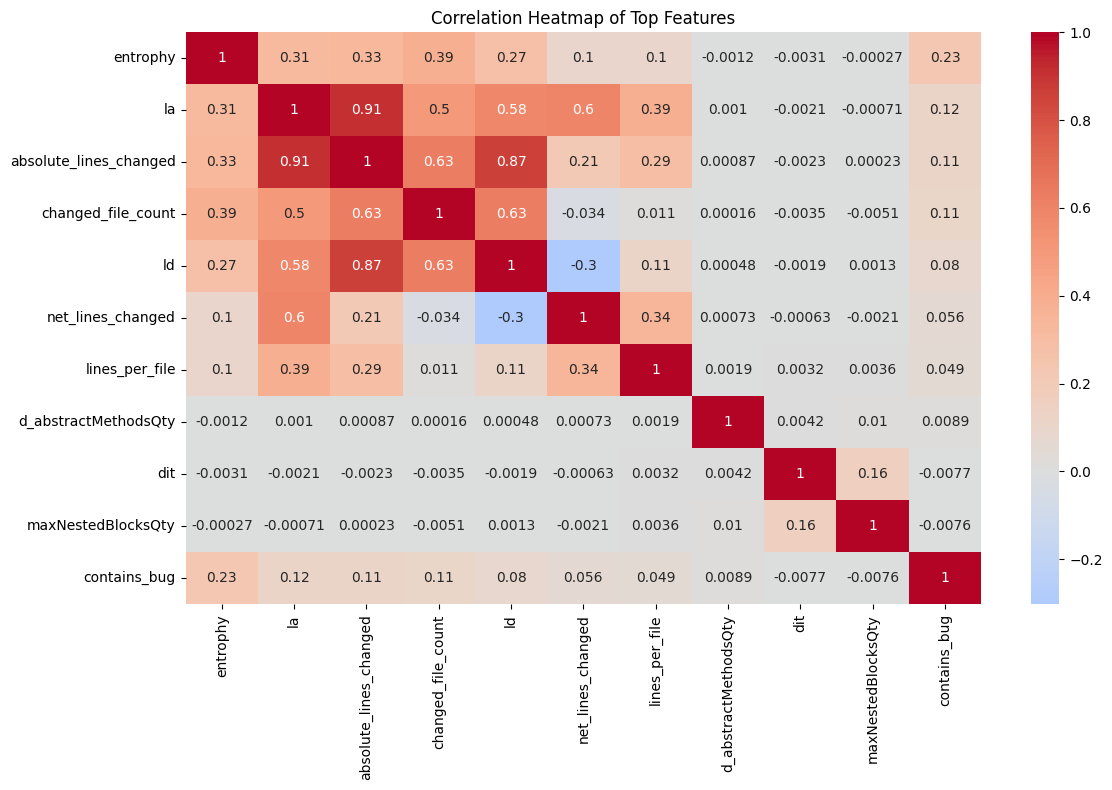

In [20]:
import seaborn as sns

# Calculate correlation with target variable
correlations = df[NUMERIC_COLUMNS].apply(lambda x: x.corr(df['contains_bug']))

# Sort correlations by absolute value
correlations_abs = correlations.abs().sort_values(ascending=False)

# Select top features based on correlation (e.g., top 10)
top_correlated_features = correlations_abs.head(10)

print("Top 10 features by correlation with contains_bug:")
print(top_correlated_features)

# Create a heatmap of correlations between top features
import matplotlib.pyplot as plt

# Select top features for correlation matrix
top_features = correlations_abs.index[:10]
correlation_matrix = df[list(top_features) + ['contains_bug']].corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Top Features')
plt.tight_layout()
plt.show()

# Feature selection with sklearn

In [67]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# Select top 10 features using ANOVA F-value
selector = SelectKBest(f_classif, k=10)
selector.fit(df[NUMERIC_COLUMNS], df[Y_COLUMN])

# Get selected features
selected_features = df[NUMERIC_COLUMNS].columns[selector.get_support()]

print("Top 10 features by ANOVA F-value:")
print(selected_features)




Top 10 features by ANOVA F-value:
Index(['d_abstractMethodsQty', 'dit', 'maxNestedBlocksQty', 'entrophy', 'la',
       'ld', 'net_lines_changed', 'absolute_lines_changed', 'lines_per_file',
       'changed_file_count'],
      dtype='object')


In [22]:
# Select top 10 features using chi-squared
selector = SelectKBest(chi2, k=10)
selector.fit(df[NUMERIC_COLUMNS], df[Y_COLUMN])

# Get selected features
selected_features = df[NUMERIC_COLUMNS].columns[selector.get_support()]

print("Top 10 features by chi-squared:")
print(selected_features)




ValueError: Input X must be non-negative.

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

# Select top 25 features using Extra Trees Classifier
selector = ExtraTreesClassifier(n_estimators=100)
selector.fit(df[NUMERIC_COLUMNS], df[Y_COLUMN])

# Get feature importances
feature_importances = pd.Series(selector.feature_importances_, index=df[NUMERIC_COLUMNS].columns)

# Sort feature importances
top_features = feature_importances.sort_values(ascending=False).head(25)

print("Top 25 features by Extra Trees Classifier:")
print(top_features)

# Create a bar plot of feature importances
plt.figure(figsize=(12, 8))
top_features.plot(kind='bar')
plt.title('Feature Importances from Extra Trees Classifier')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()




Top 25 features by Extra Trees Classifier:
changed_file_count        0.163333
entrophy                  0.144485
absolute_lines_changed    0.094891
ld                        0.080462
la                        0.079256
net_lines_changed         0.060774
lines_per_file            0.056512
uniqueWordsQty            0.010417
lcom*                     0.009075
modifiers                 0.008881
stringLiteralsQty         0.008867
fanout                    0.008805
cbo                       0.008698
dit                       0.008117
rfc                       0.007798
cboModified               0.007682
d_uniqueWordsQty          0.007461
loc                       0.007389
returnQty                 0.007388
maxNestedBlocksQty        0.007344
publicMethodsQty          0.006722
assignmentsQty            0.006356
variablesQty              0.006247
wmc                       0.006059
visibleMethodsQty         0.005818
dtype: float64


NameError: name 'plt' is not defined

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Select top 10 features using Recursive Feature Elimination
selector = RFE(LogisticRegression(), n_features_to_select=10)
selector.fit(df[X_COLUMNS], df[Y_COLUMN])

# Get selected features
selected_features = df[X_COLUMNS].columns[selector.support_]

print("Top 10 features by Recursive Feature Elimination:")
print(selected_features)




Top 10 features by Recursive Feature Elimination:
Index(['d_defaultMethodsQty', 'd_nosi', 'tcc', 'totalMethodsQty',
       'privateMethodsQty', 'visibleMethodsQty', 'synchronizedMethodsQty',
       'protectedFieldsQty', 'fix', 'entrophy'],
      dtype='object')


In [25]:
from sklearn.feature_selection import SelectFromModel

# Select top 10 features using L1-based feature selection
selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear'))
selector.fit(df[NUMERIC_COLUMNS], df[Y_COLUMN])

# Get selected features
selected_features = df[NUMERIC_COLUMNS].columns[selector.get_support()]

print("Top 10 features by L1-based feature selection:")
print(selected_features)

Top 10 features by L1-based feature selection:
Index(['d_cboModified', 'd_wmc', 'd_dit', 'd_noc', 'd_rfc', 'd_lcom',
       'd_lcom*', 'd_tcc', 'd_lcc', 'd_staticMethodsQty',
       'd_privateMethodsQty', 'd_protectedMethodsQty', 'd_defaultMethodsQty',
       'd_visibleMethodsQty', 'd_abstractMethodsQty', 'd_finalMethodsQty',
       'd_totalFieldsQty', 'd_staticFieldsQty', 'd_privateFieldsQty',
       'd_defaultFieldsQty', 'd_nosi', 'd_loc', 'd_returnQty',
       'd_comparisonsQty', 'd_parenthesizedExpsQty', 'd_stringLiteralsQty',
       'd_numbersQty', 'd_assignmentsQty', 'd_mathOperationsQty',
       'd_variablesQty', 'd_maxNestedBlocksQty', 'd_anonymousClassesQty',
       'd_innerClassesQty', 'd_lambdasQty', 'd_uniqueWordsQty', 'd_modifiers',
       'd_logStatementsQty', 'cbo', 'cboModified', 'fanin', 'fanout', 'wmc',
       'dit', 'noc', 'rfc', 'lcom', 'lcom*', 'tcc', 'lcc', 'totalMethodsQty',
       'staticMethodsQty', 'publicMethodsQty', 'privateMethodsQty',
       'protectedMeth

# Model testing

In [57]:
# Create a model with all features and selected features
# compare the performance of the two models

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[X_COLUMNS], df[Y_COLUMN], test_size=0.2, random_state=42)

# Normalize data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


In [58]:
# Create a logistic regression model with all features
model_all = LogisticRegression()
model_all.fit(X_train_normalized, y_train)
y_pred_all = model_all.predict(X_test_normalized)
accuracy_all = accuracy_score(y_test, y_pred_all)
print("Accuracy with all features:", accuracy_all)
print("Classification report with all features:")
print(classification_report(y_test, y_pred_all))

Accuracy with all features: 0.7412654105605955
Classification report with all features:
              precision    recall  f1-score   support

       False       0.73      0.90      0.81     51766
        True       0.77      0.49      0.60     34214

    accuracy                           0.74     85980
   macro avg       0.75      0.70      0.71     85980
weighted avg       0.75      0.74      0.73     85980



In [59]:
# create random forest model with all features
from sklearn.ensemble import RandomForestClassifier

model_all = RandomForestClassifier()
model_all.fit(X_train_normalized, y_train)
y_pred_all = model_all.predict(X_test_normalized)
accuracy_all = accuracy_score(y_test, y_pred_all)
print("Accuracy with all features:", accuracy_all)
print("Classification report with all features:")
print(classification_report(y_test, y_pred_all))


Accuracy with all features: 0.9111421260758316
Classification report with all features:
              precision    recall  f1-score   support

       False       0.88      0.99      0.93     51766
        True       0.99      0.79      0.88     34214

    accuracy                           0.91     85980
   macro avg       0.93      0.89      0.90     85980
weighted avg       0.92      0.91      0.91     85980



In [60]:
# apply SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_normalized, y_train)



In [61]:
print(X_train_normalized.shape)
print(X_train_resampled.shape)

(343919, 106)
(416234, 106)


In [62]:
# Create a logistic regression model with all features
model_all = LogisticRegression()
model_all.fit(X_train_resampled, y_train_resampled)
y_pred_all = model_all.predict(X_test_normalized)
accuracy_all = accuracy_score(y_test, y_pred_all)
print("Accuracy with all features after SMOTE:", accuracy_all)
print("Classification report with all features after SMOTE:")
print(classification_report(y_test, y_pred_all))


Accuracy with all features after SMOTE: 0.7300418702023727
Classification report with all features after SMOTE:
              precision    recall  f1-score   support

       False       0.76      0.80      0.78     51766
        True       0.67      0.62      0.65     34214

    accuracy                           0.73     85980
   macro avg       0.72      0.71      0.71     85980
weighted avg       0.73      0.73      0.73     85980



In [63]:
# Create a random forest model with all features
model_all = RandomForestClassifier()
model_all.fit(X_train_resampled, y_train_resampled)
y_pred_all = model_all.predict(X_test_normalized)
accuracy_all = accuracy_score(y_test, y_pred_all)
print("Accuracy with all features after SMOTE:", accuracy_all)
print("Classification report with all features after SMOTE:")
print(classification_report(y_test, y_pred_all))


Accuracy with all features after SMOTE: 0.9050127936729472
Classification report with all features after SMOTE:
              precision    recall  f1-score   support

       False       0.88      0.98      0.93     51766
        True       0.96      0.79      0.87     34214

    accuracy                           0.91     85980
   macro avg       0.92      0.89      0.90     85980
weighted avg       0.91      0.91      0.90     85980



In [64]:
# Undersample majority class
from imblearn.under_sampling import RandomUnderSampler

# Apply random undersampling to training data
undersampler = RandomUnderSampler(random_state=42)

X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_normalized, y_train)


In [65]:
print(X_train_normalized.shape)
print(X_train_resampled.shape)

(343919, 106)
(271604, 106)


In [66]:
# Create a logistic regression model with all features
model_all = LogisticRegression()
model_all.fit(X_train_resampled, y_train_resampled)
y_pred_all = model_all.predict(X_test_normalized)
accuracy_all = accuracy_score(y_test, y_pred_all)
print("Accuracy with all features after random undersampling:", accuracy_all)
print("Classification report with all features after random undersampling:")
print(classification_report(y_test, y_pred_all))


Accuracy with all features after random undersampling: 0.7335077925098861
Classification report with all features after random undersampling:
              precision    recall  f1-score   support

       False       0.76      0.81      0.79     51766
        True       0.68      0.61      0.65     34214

    accuracy                           0.73     85980
   macro avg       0.72      0.71      0.72     85980
weighted avg       0.73      0.73      0.73     85980



In [67]:
# Create a random forest model with all features
model_all = RandomForestClassifier()
model_all.fit(X_train_resampled, y_train_resampled)
y_pred_all = model_all.predict(X_test_normalized)
accuracy_all = accuracy_score(y_test, y_pred_all)
print("Accuracy with all features after random undersampling:", accuracy_all)
print("Classification report with all features after random undersampling:")
print(classification_report(y_test, y_pred_all))


Accuracy with all features after random undersampling: 0.9178878809025355
Classification report with all features after random undersampling:
              precision    recall  f1-score   support

       False       0.90      0.98      0.93     51766
        True       0.96      0.83      0.89     34214

    accuracy                           0.92     85980
   macro avg       0.93      0.90      0.91     85980
weighted avg       0.92      0.92      0.92     85980



In [45]:
# do PCA to reduce the number of features
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA(n_components=50)

# Fit and transform the data
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)


In [46]:
# Create a logistic regression model with PCA features
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy with PCA features:", accuracy_pca)
print("Classification report with PCA features:")
print(classification_report(y_test, y_pred_pca))


Accuracy with PCA features: 0.8392508330460761
Classification report with PCA features:
              precision    recall  f1-score   support

       False       0.84      1.00      0.91     14557
        True       0.64      0.04      0.08      2849

    accuracy                           0.84     17406
   macro avg       0.74      0.52      0.49     17406
weighted avg       0.81      0.84      0.78     17406



In [47]:
# Create a random forest model with PCA features
model_pca = RandomForestClassifier()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy with PCA features:", accuracy_pca)
print("Classification report with PCA features:")
print(classification_report(y_test, y_pred_pca))

Accuracy with PCA features: 0.8579800068941744
Classification report with PCA features:
              precision    recall  f1-score   support

       False       0.86      0.99      0.92     14557
        True       0.75      0.20      0.31      2849

    accuracy                           0.86     17406
   macro avg       0.81      0.59      0.62     17406
weighted avg       0.84      0.86      0.82     17406



In [48]:
# use class weights to handle imbalanced classes
# Create a logistic regression model with class weights

model_weighted = LogisticRegression(class_weight='balanced')
model_weighted.fit(X_train_normalized, y_train)
y_pred_weighted = model_weighted.predict(X_test_normalized)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print("Accuracy with class weights:", accuracy_weighted)
print("Classification report with class weights:")
print(classification_report(y_test, y_pred_weighted))



Accuracy with class weights: 0.6624152591060554
Classification report with class weights:
              precision    recall  f1-score   support

       False       0.90      0.67      0.77     14557
        True       0.27      0.61      0.37      2849

    accuracy                           0.66     17406
   macro avg       0.58      0.64      0.57     17406
weighted avg       0.80      0.66      0.70     17406



In [49]:
# Create a random forest model with class weights
model_weighted = RandomForestClassifier(class_weight='balanced')
model_weighted.fit(X_train_normalized, y_train)
y_pred_weighted = model_weighted.predict(X_test_normalized)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print("Accuracy with class weights:", accuracy_weighted)
print("Classification report with class weights:")
print(classification_report(y_test, y_pred_weighted))


Accuracy with class weights: 0.896242674939676
Classification report with class weights:
              precision    recall  f1-score   support

       False       0.89      1.00      0.94     14557
        True       0.94      0.39      0.55      2849

    accuracy                           0.90     17406
   macro avg       0.92      0.69      0.75     17406
weighted avg       0.90      0.90      0.88     17406



In [50]:
# xgboost
from xgboost import XGBClassifier

# Create an XGBoost model
model_xgb = XGBClassifier()
model_xgb.fit(X_train_normalized, y_train)
y_pred_xgb = model_xgb.predict(X_test_normalized)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy with XGBoost model:", accuracy_xgb)
print("Classification report with XGBoost model:")
print(classification_report(y_test, y_pred_xgb))


Accuracy with XGBoost model: 0.9099161208778582
Classification report with XGBoost model:
              precision    recall  f1-score   support

       False       0.91      0.99      0.95     14557
        True       0.95      0.48      0.63      2849

    accuracy                           0.91     17406
   macro avg       0.93      0.74      0.79     17406
weighted avg       0.91      0.91      0.90     17406



In [51]:
# oversample for xgboost
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_normalized, y_train)

In [52]:
# Create an XGBoost model
model_xgb = XGBClassifier()
model_xgb.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = model_xgb.predict(X_test_normalized)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy with XGBoost model after SMOTE:", accuracy_xgb)
print("Classification report with XGBoost model after SMOTE:")
print(classification_report(y_test, y_pred_xgb))

Accuracy with XGBoost model after SMOTE: 0.8827990348155809
Classification report with XGBoost model after SMOTE:
              precision    recall  f1-score   support

       False       0.89      0.99      0.93     14557
        True       0.84      0.35      0.49      2849

    accuracy                           0.88     17406
   macro avg       0.86      0.67      0.71     17406
weighted avg       0.88      0.88      0.86     17406



In [53]:
# undersample for xgboost
undersampler = RandomUnderSampler(random_state=42)

X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_normalized, y_train)

In [54]:
# Create an XGBoost model with undersampled data
model_xgb = XGBClassifier()
model_xgb.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = model_xgb.predict(X_test_normalized)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy with XGBoost model after random undersampling:", accuracy_xgb)
print("Classification report with XGBoost model after random undersampling:")
print(classification_report(y_test, y_pred_xgb))

Accuracy with XGBoost model after random undersampling: 0.8324715615305067
Classification report with XGBoost model after random undersampling:
              precision    recall  f1-score   support

       False       0.96      0.84      0.89     14557
        True       0.49      0.82      0.62      2849

    accuracy                           0.83     17406
   macro avg       0.73      0.83      0.75     17406
weighted avg       0.88      0.83      0.85     17406



# Neural Networks

In [55]:
# lets implement neural network model
from sklearn.neural_network import MLPClassifier

# Create a neural network model
model_nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
model_nn.fit(X_train_normalized, y_train)

y_pred_nn = model_nn.predict(X_test_normalized)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Accuracy with neural network model:", accuracy_nn)
print("Classification report with neural network model:")
print(classification_report(y_test, y_pred_nn))



Accuracy with neural network model: 0.8370676778122487
Classification report with neural network model:
              precision    recall  f1-score   support

       False       0.85      0.98      0.91     14557
        True       0.51      0.10      0.17      2849

    accuracy                           0.84     17406
   macro avg       0.68      0.54      0.54     17406
weighted avg       0.79      0.84      0.79     17406



In [62]:
# lets use scale pos weight to handle imbalanced classes
# Calculate the ratio of negative to positive samples
scale_pos_weight = (y_train['contains_bug'] == False).sum() / (y_train['contains_bug'] == True).sum()

# Create an XGBoost model with scale_pos_weight
model_xgb = XGBClassifier(scale_pos_weight=scale_pos_weight)
model_xgb.fit(X_train_normalized, y_train.values.ravel())
y_pred_xgb = model_xgb.predict(X_test_normalized)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy with XGBoost model and scale_pos_weight:", accuracy_xgb)
print("Classification report with XGBoost model and scale_pos_weight:")
print(classification_report(y_test, y_pred_xgb))


Accuracy with XGBoost model and scale_pos_weight: 0.8942893255199357
Classification report with XGBoost model and scale_pos_weight:
              precision    recall  f1-score   support

       False       0.96      0.91      0.94     14557
        True       0.64      0.82      0.72      2849

    accuracy                           0.89     17406
   macro avg       0.80      0.86      0.83     17406
weighted avg       0.91      0.89      0.90     17406



In [69]:
# Create a logistic regression model with selected features
model_selected = LogisticRegression()
model_selected.fit(X_train_normalized[:, selector.get_support()], y_train)
y_pred_selected = model_selected.predict(X_test_normalized[:, selector.get_support()])
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy with selected features:", accuracy_selected)
print("Classification report with selected features:")
print(classification_report(y_test, y_pred_selected))


TypeError: only integer scalar arrays can be converted to a scalar index

In [70]:
# print label distribution
print(df['contains_bug'].value_counts())

contains_bug
False    72912
True     14114
Name: count, dtype: int64
